# SLM: Holoeye LC-2500

Este es un documento para aprender a manejar la clase SLM de *py_lab* empleando el modulador espacial de luz LC-2500 de Holoeye. También sirve como test exhaustivo de que el software funciona sin errores.

In [1]:
%load_ext autoreload
%autoreload 2

## Creación

En primer lugar hay que importar la clase y crear el objeto. Los SLM no necesitan establecer una conexión directa, ya que se tratan como una pantalla.

In [2]:
import numpy as np
from py_lab.slm import SLM

number of processors: 4
total memory        : 6.0 Gb
available memory    : 51 %
max frequency       : 2794 GHz


Al crear el objeto, únicamente hay que indicarle el nombre adecuado (HoloEye2500, que es el que se da por defecto). El método de creación del objeto presenta los siguientes parámetros:

* **M** (float): Factor de magnificación. Por defecto: 1.
* **wavelength** (float): Longitud de onda en mm (para la interacción con Diffractio. Por defecto: 633 nm.

In [3]:
slm = SLM(name="HoloEye2500")

Una vez creado el objeto, tiene las siguientes propiedades:

* **name** (str): Nombre de la tarjeta (U3 o U6).
* **resolution** (np.ndarray): Array of resolution.
* **pixel_size** (np.ndarray): Array con el tamaño de los píxeles.
* **dynamic_range** (int): Rango dinámico en bits.
* **wait_time** (float): Tiempo de espera después de cambiar la imagen.
* **ID_screen** (int): ID de la pantalla correspondiente al SLM.
* **calibration** (tuple): Tupla que contiene las transmisiones y las fases en modulación de amplitud y modulación de fase.
* **_images** (list): Lista con los nombres de las ventanas en las que se representa imagen.

## Máscaras

La utulidad principal del SLM es implementar una máscara que afectará a la luz que incide en el SLM. 

Paa implementar una imagen, se emplea el método *Send_Image*:

* **image** (string, np.ndarray o Scalar_mask_XY): Imagen que se enviará al SLM. Si es un str, el programa intentará cargar la imagen a partir del archivo especificado.
* **path** (None o str): Si no es None y image es un nombre de archivo, lo buscará en la carpeta especificada por esta variable. Por defecto: None.
* **var_name** (None o str): Si image es un nombre de archivo tipo npz, este es el nombre de la variable que se debe coger. SI es None, se cogerá la primera variable que se encuentre. Por defecto: None.
* **kind** (str): 'phase', 'amplitude' o 'intensity'. Si image es un Scalar_mask_XY, esta variable indica si debe tomar la fase, la amplitud o la intensidad. Por defecto: 'phase'.
* **norm** (None o float): Si no es None, este valor corresponderá al valor máximo de nivel de gris. Por defecto: None.
* **draw** (bool): SI es True, se representa la imagen enviada al SLM. Por defecto: False.
* **window_name** (str): Nombre de la ventana en que se muestra la imagen enviada al SLM. Por defecto: 'SLM'.

Este método devuelve un array de numpy con la imagen enviada.

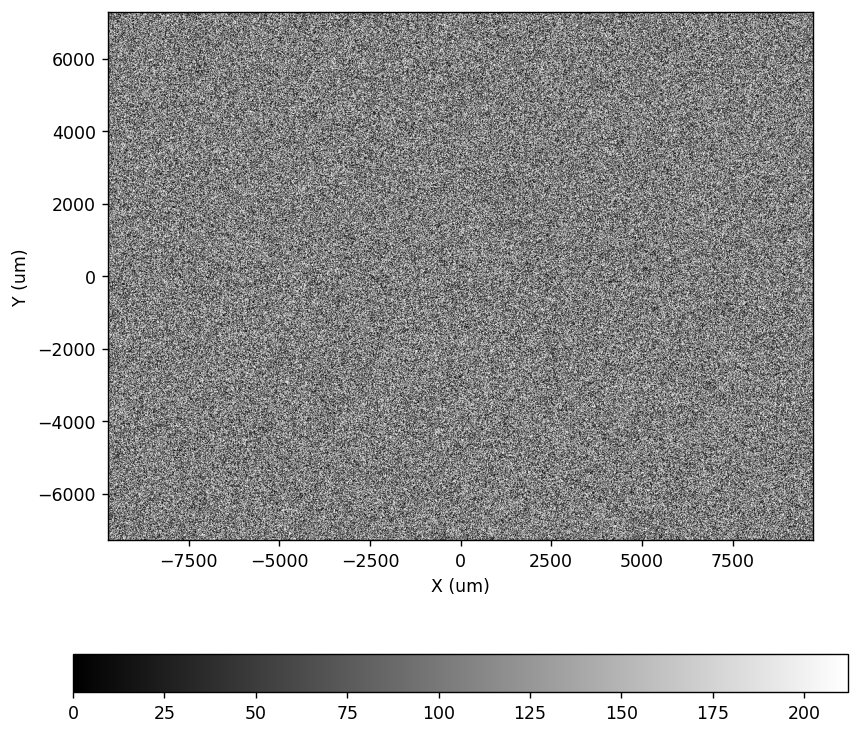

In [7]:
# Array de numpy
imagen1 = slm.Send_Image(image=np.random.rand(*np.flip(slm.resolution)), norm=1.2, draw=True, window_name='SLM1')

In [8]:
# Archivo npz
imagen2 = slm.Send_Image(image='data/Mascara.npz', path=None, var_name='mask', norm=1.2, draw=True, window_name='SLM2')

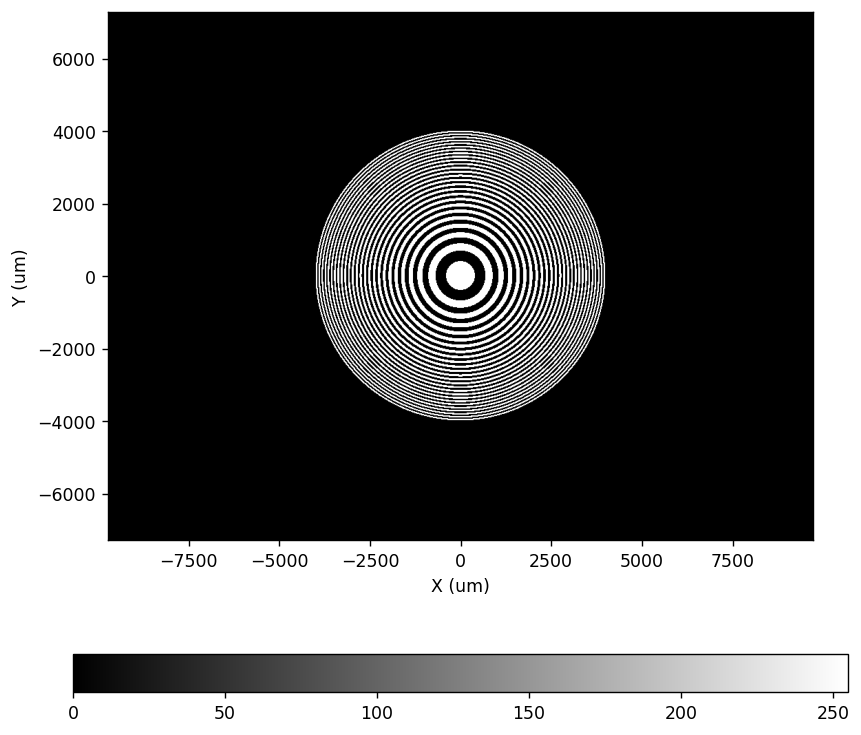

In [9]:
# Array de numpy
from diffractio import np, plt, sp, um, mm, nm, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY
import numpy as np

mask = Scalar_mask_XY(x=slm.x, y=slm.y, wavelength=slm.wavelength)
mask.fresnel_lens(r0=(0, 0), radius = 4*mm, focal=500*mm)

imagen3 = slm.Send_Image(image=mask, kind='amplitude', draw=True, window_name='SLM3')

Se pueden cerrar imágenes una a una empleando el método *Close_Image*, o todas a la vez con el método *Close_All_Images*. También se puede cerrar una imagen haciendo activa su ventana y presionando la tecla Esc.

In [10]:
# Una imagen
slm.Close_Image('SLM1')

In [11]:
# Todas las imagenes
slm.Close_All_Images()